# Downloading Necessary Packages 

In [158]:
import pandas as pd
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix,recall_score,precision_score,accuracy_score,precision_recall_curve,roc_curve,roc_auc_score,make_scorer
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import average_precision_score

In [159]:
# Loading the data
#Loading data
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [160]:
#Setting passenger Id as index column
train_data = train_data.set_index("PassengerId")
test_data = test_data.set_index("PassengerId")

# Data Cleaning 

In [161]:
#We want to fill in the missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation)
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        elif Pclass == 3:
            return 24
    else:
        return Age


In [162]:
train_data['Age'] = train_data[['Age','Pclass']].apply(impute_age,axis=1)

In [163]:
train_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen 'Carrie'",female,24.0,1,2,W./C. 6607,23.4500,NaN,S


In [164]:
train_data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

# Question 1: What are the odds ratio of surviving the shipwreck between male and female?

#### First we calculate male and female Survivors and Non-Survivors:
#### Male Survivors = (577/891)x342 = 220
#### Female Survivors = (314/891)x342 = 122
#### Female NonSurvivors = 314-122=192
#### Male NonSurvivors = 577-220 = 357

#### Next we can just calculte the odds ratio for each gender
#### Odds of male surviving = 220/347=.616
#### Odds of female surviving = 122/192=.635

#### Then the odds ratio would be .635/.616=1.03 and .616/.635=.97. The odds ratio is approximately 1.03, which means that the odds of a female passenger surviving were about the same as a male passenger. 



# Question 2: Create dummy variable for Pclass

In [165]:
train_data.drop(['Embarked','Name','Ticket','Cabin','Fare','Parch','SibSp'],axis=1,inplace=True)

In [166]:
for col in train_data.dtypes[train_data.dtypes=="object"].index:
    for_dummy=train_data.pop(col)
    train_data=pd.concat([train_data,pd.get_dummies(for_dummy,prefix=col)],axis=1)
train_data.head()


,Survived,Pclass,Age,Sex_female,Sex_male
PassengerId,,,,,
1,0,3,22.0,0,1
2,1,1,38.0,1,0
3,1,3,26.0,1,0
4,1,1,35.0,1,0
5,0,3,35.0,0,1


In [167]:
pclass = pd.get_dummies(train_data['Pclass'],drop_first=True)
train_data = pd.concat([train_data,pclass],axis=1)
train_data

,Survived,Pclass,Age,Sex_female,Sex_male,2,3
PassengerId,,,,,,,
1,0,3,22.0,0,1,0,1
2,1,1,38.0,1,0,0,0
3,1,3,26.0,1,0,0,1
4,1,1,35.0,1,0,0,0
5,0,3,35.0,0,1,0,1
...,...,...,...,...,...,...,...
887,0,2,27.0,0,1,1,0
888,1,1,19.0,1,0,0,0
889,0,3,24.0,1,0,0,1


In [168]:
train_data.rename(columns = {2:'Pclass2'}, inplace = True)
train_data.rename(columns = {3:'Pclass3'}, inplace = True)

In [169]:
train_data.drop('Pclass',axis=1,inplace=True)


In [170]:
train_data

,Survived,Age,Sex_female,Sex_male,Pclass2,Pclass3
PassengerId,,,,,,
1,0,22.0,0,1,0,1
2,1,38.0,1,0,0,0
3,1,26.0,1,0,0,1
4,1,35.0,1,0,0,0
5,0,35.0,0,1,0,1
...,...,...,...,...,...,...
887,0,27.0,0,1,1,0
888,1,19.0,1,0,0,0
889,0,24.0,1,0,0,1


# Question 3: Using the Random Forest, dependent variable: Survived, independent variable: age, gender, and Pclass.

In [171]:
labels=train_data.pop("Survived")

In [172]:
train_data

,Age,Sex_female,Sex_male,Pclass2,Pclass3
PassengerId,,,,,
1,22.0,0,1,0,1
2,38.0,1,0,0,0
3,26.0,1,0,0,1
4,35.0,1,0,0,0
5,35.0,0,1,0,1
...,...,...,...,...,...
887,27.0,0,1,1,0
888,19.0,1,0,0,0
889,24.0,1,0,0,1


In [173]:
X_train, X_test, y_train, y_test = train_test_split(train_data,labels,test_size=0.30, random_state=101)

In [174]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()


In [175]:
rf.fit(X_train,y_train)

RandomForestClassifier()

# Question 3a: Report accuracy using 5-fold cross-validation

In [177]:
target = labels
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=5, n_jobs=1, scoring=scoring)
print(score)

[0.79329609 0.80337079 0.7752809  0.7752809  0.7752809 ]


# Question 3b: Report confusion matrix

[[131  23]
 [ 39  75]]


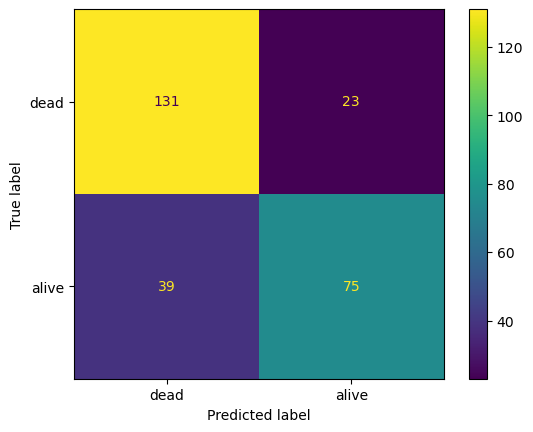

In [178]:
y_test_predicted=rf.predict(X_test)
cm=confusion_matrix(y_test,y_test_predicted,labels=rf.classes_)
print(cm)
cm_disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['dead','alive'])
cm_disp.plot()

# Question 3c: What is precision score? How do you interpret the score?

In [180]:
print(classification_report(y_test,y_test_predicted))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       154
           1       0.77      0.66      0.71       114

    accuracy                           0.77       268
   macro avg       0.77      0.75      0.76       268
weighted avg       0.77      0.77      0.77       268



#### our precision score is .77 which is not too high meaning that the model could be fittend and trained a little better.

# Question 3d: What is recall score? How do you interpret the score?

In [181]:
print(classification_report(y_test,y_test_predicted))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       154
           1       0.77      0.66      0.71       114

    accuracy                           0.77       268
   macro avg       0.77      0.75      0.76       268
weighted avg       0.77      0.77      0.77       268



# Question 3e: Report the precision/recall trade-off plot?

In [182]:
print('Recall score\n')
print(recall_score(y_test,y_test_predicted))
print('\nPrecision score: \n')
print(precision_score(y_test,y_test_predicted))
print('\nAccuracy score \n')
print(accuracy_score(y_test,y_test_predicted))

Recall score

0.6578947368421053

Precision score: 

0.7653061224489796

Accuracy score 

0.7686567164179104


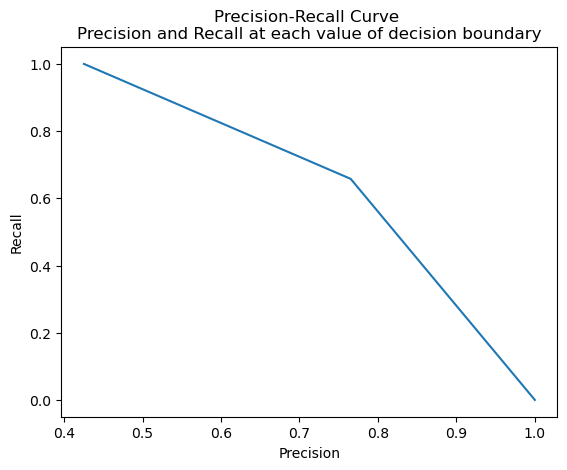

In [183]:
precision,recall,thresholds = precision_recall_curve(y_test,y_test_predicted)

plt.figure()
plt.plot(precision,recall)
plt.title('Precision-Recall Curve \nPrecision and Recall at each value of decision boundary')
plt.xlabel('Precision')
_ = plt.ylabel('Recall')

# Question 3f: Report the ROC curve?

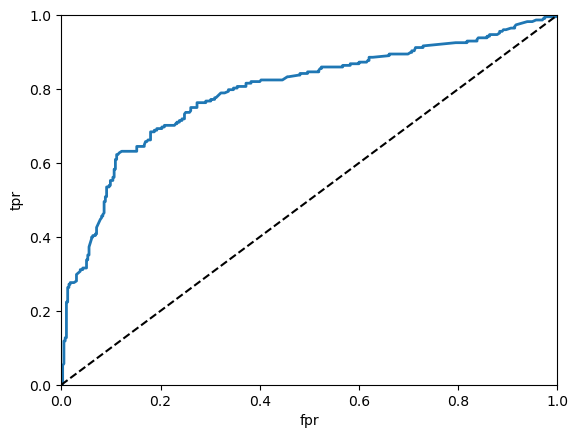

In [184]:

sgd_clf = SGDClassifier(max_iter=3000, random_state=42)
sgd_clf.fit(X_train,y_train)

y_scores = cross_val_predict(sgd_clf, X_train, y_train, cv=5, method="decision_function")
y_scores

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel("fpr")
    plt.ylabel("tpr")
plot_roc_curve(fpr, tpr)
plt.show()

# Question 3g: What is area under curve?

In [185]:
average_precision = average_precision_score(y_train, y_scores)
average_precision

0.719532525986518